###### Import Statement

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pydot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score,KFold
from sklearn.tree import export_graphviz
from scipy import misc
%matplotlib inline

###### Preprocessing

In [2]:
#Reading dataset from the csv file
dataset=pd.read_csv('C:/Users/Petrofac/Desktop/Dissertation/glass.csv')
#Randomozing the dataset rows
np.random.seed(1)
shuffled_index=np.random.permutation(dataset.index)
dataset=dataset.loc[shuffled_index]

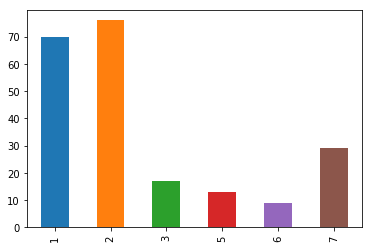

In [3]:
#NonUniform distribution of data
dataset['Type'].value_counts().sort_index().plot.bar()
plt.show()
# Labels are the values we want to predict
labels = np.array(dataset['Type'])

In [4]:
#Convert dataset into taarget and attribute set
# axis 1 refers to the columns
dataset_data= dataset.drop('Type', axis = 1)
dataset_target=dataset['Type']
feature_list=dataset_data.columns

In [6]:
#Splitting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(dataset_data, dataset_target, test_size=0.2, random_state=1)

###### Random Forest from sklearn 

In [17]:
#Creating random forest object and training the forest with the training data
objRandom=RandomForestClassifier(n_estimators=100,random_state=1)
objRandom.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

###### Pruning Random Forest from skLearn

In [18]:
#Decision trees in the random forest
print(objRandom.estimators_)

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1791095845, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=2135392491, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_le

C:\Users\Petrofac\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':


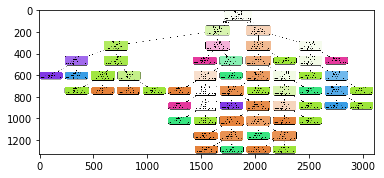

In [19]:
# Acessing a tree from random forest classifier
randomForestTree1 = objRandom.estimators_[0]
# Export the image to a dot file
export_graphviz(randomForestTree1, out_file = 'tree.dot', feature_names = feature_list, filled=True, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png');
file = misc.imread('tree.png')
plt.imshow(file)

In [20]:
listColumn=[]
instanceNumbr ='inst'
for inst in range(len(X_train)):
    columnHeader=instanceNumbr+str(inst+1)
    listColumn.append(columnHeader)

listlabel=[]
decisionTree ='DTree'
for header in range(objRandom.n_estimators):
    rowHeader=decisionTree+str(header)
    listlabel.append(rowHeader)

listPredict=[]
for estimators in objRandom.estimators_:
    estimators.classes_=objRandom.classes_
    predictions=estimators.predict(X_train)
    listPredict.append(predictions)
    #print(predictions)
    #print(estimators)
    
#print(listColumn)
#print(listlabel)
#print(listPredict)
#tListPredict=np.transpose(listPredict)
#print(tListPredict)

df1 = pd.DataFrame(listPredict,columns=listColumn)
df2 = pd.DataFrame(listlabel)
clusterSet=pd.concat([df2,df1],axis=1)
# tc = np.transpose(clusterSet)
# pd.concat([df2,df1],axis=1)
# print(tc.head())
# tc1= tc.drop(0, axis = 1)
# print(clusterSet)
# print(listPredict)

In [21]:
#K means clustering algorithm from scratch
class Kmean_Custom:
    def __init__(self,cluster_no,tolerance=0.2,max_iteration=500):
        self.cluster_no=cluster_no
        self.tolerance=tolerance
        self.max_iteration=max_iteration
    
    #Custom dictance algorithm
    def get_customdistance(self,tree,centroid):
        diff=0        
        tree_toList=list(tree)
        centroid_toList=list(centroid)
        dimension=len(tree_toList)
        dimensioncentroid=len(centroid)
        
        if dimension==dimensioncentroid:
            
            for inst in range(dimension):
                
                if(tree_toList[inst]==centroid_toList[inst]):
                    diff=diff
                else:
                    diff=diff+1
                    
            diff=int(round(diff))
            
        else:
            
            diff=99999
        return diff
    
    #fit fuction 
    def fit(self,X):
        self.centroid={}        
        kcentroids = X.sample(n=self.cluster_no, random_state=0).values
        
        #Initialize random centroids
        for cent_no in range(self.cluster_no):
            self.centroid[cent_no]=kcentroids[cent_no]
           
        #Iterate till max iteration condition exceeds
        for iter_no in range(self.max_iteration):
            self.classify={}
            
            for clustr_no in range(self.cluster_no):
                self.classify[clustr_no]=[]

            self.XArray=X.values
            for intance in self.XArray:
                dist=[]
                #To get 
                for key,value in self.centroid.items():
                    distances=self.get_customdistance(intance,self.centroid[key])
                    dist.append(distances)

                classify_point=dist.index(min(dist))
                self.classify[classify_point].append(intance)

            previous_centroids=dict(self.centroid)
            new_cetnroid={}
            
            for classified_data in self.classify:
                
                if self.classify[classified_data]:                                   
                    new_cetnroid[classified_data]=np.average(self.classify[classified_data],axis=0)
                else :
                    new_cetnroid[classified_data]=self.classify[classified_data]     

            for cluster_centroid in self.centroid:
                new_cetnroid[cluster_centroid]=np.round(new_cetnroid[cluster_centroid]).astype(int)
                self.centroid[cluster_centroid]=new_cetnroid[cluster_centroid]                    
                        
            optimized_cluster=True
            
            for cluster_centroid in self.centroid:
                originalCentroid=previous_centroids[cluster_centroid]                
                present_centroid= self.centroid[cluster_centroid]
                diff=self.get_customdistance(originalCentroid,present_centroid)
                               
                if (diff/100)>self.tolerance:
                    optimized_cluster=False

            if optimized_cluster:              
                break
        #Returns centroids        
        return self.centroid

In [22]:
#To get the closest instance that matches to the centroid
def get_instance_centroid(df,centroid,randomforest_subset):    
    difference=9999
    diff=0
    index_instance=0
    for index, row in df.iterrows():
        instance=row.values
        diff=0
        for inst in instance:
            if(instance[inst]==centroid[inst]):
                diff=diff
            else:
                diff=diff+1     
        if (diff<difference) :
            if (index in randomforest_subset):
                pass
            else:
                index_instance=index
                difference=diff        
     
    return index_instance

In [23]:
clf=Kmean_Custom(cluster_no=20)
centroid=clf.fit(df1)
#Find the tree that has least distance towards the centroids
randomforest_subset=[]

#Finding the trees corresponding to the centroids
for cluster_centers in centroid:
    if len(centroid[cluster_centers])>0:
        tree_index=get_instance_centroid(df1,centroid[cluster_centers],randomforest_subset)
        randomforest_subset.append(tree_index)
print(randomforest_subset)

#Create a new subforest object
estimator_array=[]
for i in randomforest_subset:
    estimator_array.append(objRandom.estimators_[i])  
    
new_rfObject=RandomForestClassifier(n_estimators=len(randomforest_subset))
new_rfObject.estimators_=estimator_array
new_rfObject.classes_=objRandom.classes_
new_rfObject.n_classes_=objRandom.n_classes_
new_rfObject.n_outputs_=objRandom.n_outputs_
    

[42, 35, 2, 3, 4, 50, 5, 75, 77, 8, 48, 15, 6]


In [24]:
print(objRandom.score(X_test,y_test))
print(new_rfObject.score(X_test,y_test))

0.7209302325581395
0.7441860465116279
